<a href="https://colab.research.google.com/github/BedinEduardo/Colab_Repositories/blob/master/PyTorhc_Documentation_The_Fundamentas_AutoGrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Fundamentals of AutoGrad

*PyTorch's Autograd* feature  is part of what make PyTorch flexible and fast for building machine learning projects. It allows for the rapid and easy computation of multiple partial derivatives  - also refered as *gradients*- over complex computation. This operation is central to backpropagation-based neural network learning.

The power of autograd comes from the fact that it traces your computation dynamically *at runtime*, meaning that if your model has decision branches, or loops lengths are nor known until runtime, the computation will still be traced correctly, and you will get correct gradients to drive learning. This, combined with the fact that your modells are built in Python, offers far more flexibility than frameworks that rely on static analysis of a more rigidly-structured model for computing gradients.

## What Do We Need Autograd For?

A ML model is a *function*, with inputs and outputs. For this discussion

Since we will mostly be discussing autograd in the context of training, our output of interest will be the loss. Loss function is a single-valued scalar function of the models output. This function express how far off our model's prediction was from a particular input's ideal output.

Training the model -> Minimize the loss. In real world, it means an interative process of nudging the learning weights until we see that we get a tolerable loss for a wide variety of inputs.

HOw to decice how far and in which direction to nudge the weights? - *Minimize the loss* -> derivates = 0

Loss -> Output

The partial derivatives of the model's output with respect to its inputs, if were to expand the expression using the chain rule again, involve many local partial derivatives over every multiplied learning weight, every activation function, and every other mathematical transformation in the model. The full expression for each such partial derivative is the sum of the products of the local gradient of *every posssible path* trough the computation graph that ends with the variable whose gradient we are trying to measure.

Gradients over the lerarning weights are the interest - *what direction to change each weight* to get loss closer to zero.

Number of local derivatives growths exponentially mith more deep is the NN - more complexity in computing. Here the autograd comes: tracks the history of each computation.
Every computed tensor - model carries history - input tensor to output tensor - computing own derivates - the greatly speed - needs to learn

### A simple Example


In [ ]:
import torch
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math



`requires_grad=True`, setting this flag means that in every computation that follows, autograd will be accumulating the historyof the computation in the output tensorof that computation.

In [ ]:
a = torch.linspace(0.,2 * math.pi, steps =25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


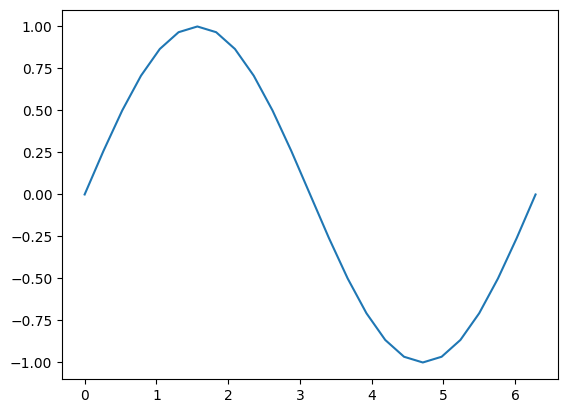

In [ ]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

In [ ]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


In [ ]:
c = 2 * b
print(c)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)


In [ ]:
d = c + 1
print(d)

tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


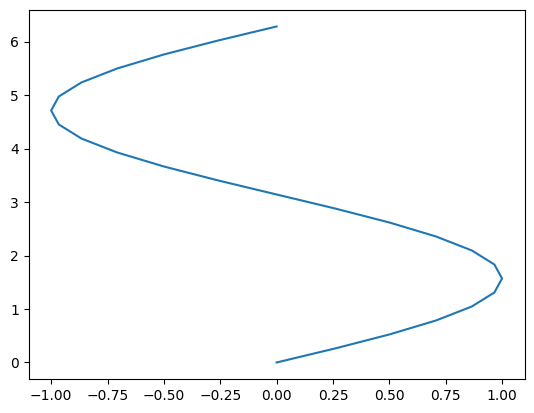

In [ ]:
plt.plot(b.detach(), a.detach())

In [ ]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


In [ ]:
print('d: ')
print(d.grad_fn)

d: 


In [ ]:
print(d.grad_fn.next_functions)

((<MulBackward0 object at 0x7a77957af2b0>, 0), (None, 0))


In [ ]:
print(d.grad_fn.next_functions[0][0].next_functions)

((<SinBackward0 object at 0x7a77958e6f50>, 0), (None, 0))


In [ ]:
print(c.grad_fn)

In [ ]:
print(b.grad_fn)

In [ ]:
print(a.grad_fn)

None


With all this machinery in place, how do we get derivatives out? You call the `backward()` method on the output, and check the input's `grad` property ot inspect the gradients.


In [ ]:
out.backward()
print(a.grad)

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


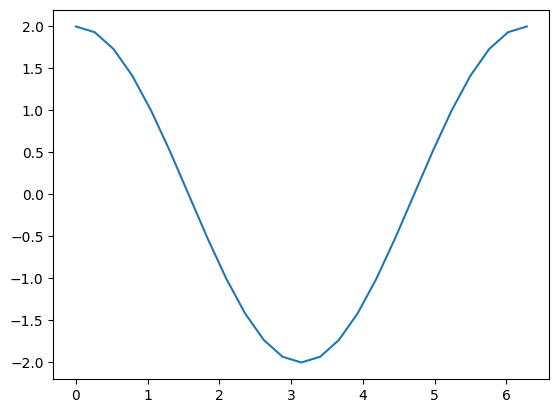

In [ ]:
plt.plot(a.detach(), a.grad.detach())

Recall the computation step we took to get here:

In [ ]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
b = torch.sin(a)
c = 2 * b
d = c + 1
out = d.sum()

In [ ]:
print(a)
print("\n")
print(b)
print("\n")
print(c)
print("\n")
print(d)
print("\n")
print(out)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e

## Autograd in Training

We hada a brief look at how autograd works, but now does it look when it is used for its intended pourpose? Lets define a small model and examine how it changes after a single training batch.

In [ ]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):
  def __init__(self):
    super(TinyModel, self).__init__()

    self.layer1 = torch.nn.Linear(DIM_IN, HIDDEN_SIZE)
    self.relu = torch.nn.ReLU()
    self.layer2 = torch.nn.Linear(HIDDEN_SIZE, DIM_OUT)

  def forward(self, x):
    x = self.layer1(x)
    x = self.relu(x)
    x = self.layer2(x)

    return x

In [ ]:
some_input = torch.rand(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.rand(BATCH_SIZE, DIM_OUT, requires_grad=False)

In [ ]:
model = TinyModel()

In [ ]:
print(model)

TinyModel(
  (layer1): Linear(in_features=1000, out_features=100, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=100, out_features=10, bias=True)
)


One thing that you might notice is that we never specify `requires_grad=True` for the models layers. Within a subclass of `torch.nn.Module`, it's assumed that we want to track gradients on the layers weights for learning.

If we look at the layers of the model, we can examine the values of the wieghts, that no gradients have been computed yet:

In [ ]:
print(model.layer2.weight[0][0:10])  # small slice
print(model.layer2.weight.grad)

tensor([ 0.0909,  0.0555, -0.0349,  0.0862, -0.0445,  0.0037, -0.0102, -0.0162,
         0.0010,  0.0486], grad_fn=<SliceBackward0>)
None


In [ ]:
# Let's see how this change when run through one training batch.
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
prediction = model(some_input)
loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(63.8323, grad_fn=<SumBackward0>)


In [ ]:
# Now lets call loss.backward()
loss.backward()
print(model.layer2.weight[0][0:10])  #Weights
print(model.layer2.weight.grad[0][0:10])  #gradients

tensor([ 0.0909,  0.0555, -0.0349,  0.0862, -0.0445,  0.0037, -0.0102, -0.0162,
         0.0010,  0.0486], grad_fn=<SliceBackward0>)
tensor([-4.4462,  0.0000, -4.6891, -0.7880, -3.9062,  0.0000, -0.8196, -8.4671,
         0.0000,  0.0000])


In [ ]:
# optimzer step
optimizer.step()
print(model.layer2.weight[0][0:10])  #updated
print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0954,  0.0555, -0.0302,  0.0870, -0.0406,  0.0037, -0.0093, -0.0077,
         0.0010,  0.0486], grad_fn=<SliceBackward0>)
tensor([-4.4462,  0.0000, -4.6891, -0.7880, -3.9062,  0.0000, -0.8196, -8.4671,
         0.0000,  0.0000])


One important thing about the process: After calling `optmizer.step()`, you need to call `optmizer.zero_grad()`, or else every time you run `loss.backward()`, the gradients on the learning weights will acumulate:

In [ ]:
print(model.layer2.weight.grad[0][0:10])

for i in range(0,5):
  prediction = model(some_input)
  loss = (ideal_output - prediction).pow(2).sum()
  loss.backward()

print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad(set_to_none=False)   # Zeroing the gradients

print(model.layer2.weight.grad[0][0:10])

tensor([-4.4462,  0.0000, -4.6891, -0.7880, -3.9062,  0.0000, -0.8196, -8.4671,
         0.0000,  0.0000])
tensor([46.6156,  0.0000, -2.2129,  0.0487, 30.5680,  0.0000,  0.7681, 22.7493,
         0.0000,  0.0000])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


Failling to zero the gradients before running your next training batch will cause the gradients to blow up in this manner, causing incorrect and unpredictable learning results.

# Turning Autograd Off and On

There are situations where you will need fine-grained control over whether autograd is enable.
There are multiple way to do this, depending on situation

The simplest one is to change the `requires_grad` flag on a tensor directly:

In [ ]:
a = torch.ones(2, 3, requires_grad=True)
print(a)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
b1 = 2 *a
print(b1)

tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)


In [ ]:
a.requires_grad = False
b2 = 2 * a
print(b2)

tensor([[2., 2., 2.],
        [2., 2., 2.]])


In the cell above -> computation history

In [ ]:
a = torch.ones(2,3, requires_grad=True) * 2
b = torch.ones(2,3, requires_grad=True) * 3

In [ ]:
print(a)
print("\n")
print(b)

tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)


tensor([[3., 3., 3.],
        [3., 3., 3.]], grad_fn=<MulBackward0>)


In [ ]:
c1 = a + b
print(c1)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)


In [ ]:
with torch.no_grad():
  c2 = a + b

print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [ ]:
c3 = a * b

print(c3)

tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


`torch.no_grad()` can also be used as a function or method decorator

In [ ]:
def add_tensor1(x,y):
  return x + y

@torch.no_grad()
def add_tensor2(x,y):
  return x + y


In [ ]:
a = torch.ones(2,3, requires_grad = True) * 2
print(a)

tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)


In [ ]:
b = torch.ones(2,3, requires_grad=True) * 3
print(b)

tensor([[3., 3., 3.],
        [3., 3., 3.]], grad_fn=<MulBackward0>)


In [ ]:
c1 = add_tensor1(a,b)
print(c1)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)


In [ ]:
c2 = add_tensor(a,b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)


Finally, you may have a tensor that requires gradient tracking, but you want a copy that does not. For this we have the `Tensor` object's `detach()` method - it build a copy of the tensor that is *detached* from the computation history

In [ ]:
x = torch.rand(5, requires_grad = True)
y = x.detach()

print(x)
print("\n")
print(y)

tensor([0.4900, 0.5684, 0.9459, 0.9908, 0.8862], requires_grad=True)


tensor([0.4900, 0.5684, 0.9459, 0.9908, 0.8862])


Wanted to graph some of tensor -> `matplotlib` expect NumPy array as input -> implicit conversion from a PyTorch tensor to a NumPy array is not enabled for tensors with requires_grad=True. Detached copy lets us move forward

## Autograd and In-place Operations

Used variables to capture the intermediate values of computation.
Autograd needs these intermediates values to perform *gradient* computations
*For this reason, you must be careful about using in-place oprations when using autograd*.
Doing so can destroy information you need to compute derivatives in the `backward()` call.
PyTorch will even stop you if you attempt an in-place operation on leaf variable that requires autorgrad:

## Autograd Profiler

Autograd tracks every step of your computation in detail.
Such a computation history, combined with timing information - would make a handy profiler - and autograd has that feature baked in

In [ ]:
device = torch.device('cpu')
run_on_gpu = False

if torch.cuda.is_available():
  device = torch.device('cuda')
  run_on_gpu = True

In [ ]:
x = torch.randn(2,3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2,3, requires_grad=True)

In [ ]:
with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
  for _ in range(1000):
    z = (z / x) * y

In [ ]:

print(prf.key_averages().table(sort_by='self_cpu_time_total'))


-------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::div        52.25%       3.883ms        52.25%       3.883ms       3.883us          1000  
    aten::mul        47.75%       3.549ms        47.75%       3.549ms       3.549us          1000  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 7.432ms



## Advanced Topic: More Autograd Deatail and the High-Level API

**`torch.autograd` is an engine for computing these products**. This is how we accumulate the gradients over the learning weights during the backward pass.

For these reason, the `backward()` call can *also* take an optional input.
This vector represents a set of gradients over the tensor, which are multiplied by the Jacobian of the autograd-traced tensor that precedes it.


In [ ]:
x = torch.randn(3, requires_grad=True)
print(x)

tensor([ 0.3761,  0.1191, -0.9486], requires_grad=True)


In [ ]:
y = x * 2
while y.data.norm() < 1000:
  y = y *2

print(y)

tensor([ 385.1478,  121.9683, -971.3978], grad_fn=<MulBackward0>)


For a multi-dimensional output, autograd expects us to provide gradients for those three outputs that it can multiply into the jacobian.

In [ ]:
v = torch.tensor([0.1,1.0,0.0001], dtype=torch.float)
y.backward(v)

In [ ]:
print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


## The High-Level API

API - autograd - gves direct acces to important differential matrix and vector operations.
Allows to calculate Jacobiona and *Hessian* matrices - particular function for particular inputs. *Hessian* - similar Jacobian - but express all the second derivats.
Also produce methods for taking vector products with these matrices.

In [ ]:
def exp_adder(x, y):
  return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1))  # arguments for the function
print(inputs)

(tensor([0.4705]), tensor([0.3110]))


In [ ]:
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([[3.2015]]), tensor([[3.]]))

In [ ]:
inputs = (torch.rand(3), torch.rand(3))   # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.5345, 0.0979, 0.2237]), tensor([0.8426, 0.7985, 0.3335]))


(tensor([[3.4131, 0.0000, 0.0000],
         [0.0000, 2.2058, 0.0000],
         [0.0000, 0.0000, 2.5014]]),
 tensor([[3., 0., 0.],
         [0., 3., 0.],
         [0., 0., 3.]]))

`torch.autograd.functional.hessian()` -> works identically to Jacobian -> but returns a matrix of all second derivates

In [ ]:
def do_some_doubling(x):
  y = x * 2
  while y.data.norm() < 1000:
    y = y * 2

  return y

In [ ]:
inputs = torch.randn(3)
my_gradients = torch.tensor([0.1,1.0,0.0001])
torch.autograd.functional.vjp(do_some_doubling, inputs, v=my_gradients)

(tensor([ 894.1575,  159.9537, -473.9588]),
 tensor([5.1200e+01, 5.1200e+02, 5.1200e-02]))

The `torch.autograd.functional.jvp()` method performs the same matrix multiplication as `vjp()` with the operands reverved.